# Challenge: Feedback Analysis #

## Naive Bayes Classification on Yelp Feedback ##

## By Lorenz Madarang ##

## Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00331/ ##

In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from string import punctuation
from collections import Counter
import operator

In [101]:
# Import .txt files and create two columns for the message and the sentiment
sentiment_raw = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
sentiment_raw.columns = ['message', 'sentiment']

In [102]:
sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
message      1000 non-null object
sentiment    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


### Initial Look at the Data ###

In [103]:
sentiment_raw.head()

,message,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Feature Engineering for Positive Sentiment ###

1. Take all the feedback that has been marked with a '1' for positive sentiment
2. Create an empty list
3. Iterate through every row in the pandas data frame, take every in word in the message and append to word list
4. Create a dictionary of word counts
5. Create a word list of 'keywords' that indicate positive sentiment

In [104]:
positive_sentiment = sentiment_raw[(sentiment_raw['sentiment']==1)]

In [105]:
word_list = []

In [106]:
for index, row in positive_sentiment.iterrows():
    message = row['message']
    r = re.compile(r'[{}]'.format(punctuation))
    new_strs = r.sub(' ', message)
    for word in new_strs.split():
        word_list.append(word)


In [107]:
word_list

['Wow',
 'Loved',
 'this',
 'place',
 'Stopped',
 'by',
 'during',
 'the',
 'late',
 'May',
 'bank',
 'holiday',
 'off',
 'Rick',
 'Steve',
 'recommendation',
 'and',
 'loved',
 'it',
 'The',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'were',
 'the',
 'prices',
 'The',
 'fries',
 'were',
 'great',
 'too',
 'A',
 'great',
 'touch',
 'Service',
 'was',
 'very',
 'prompt',
 'I',
 'tried',
 'the',
 'Cape',
 'Cod',
 'ravoli',
 'chicken',
 'with',
 'cranberry',
 'mmmm',
 'Highly',
 'recommended',
 'The',
 'food',
 'amazing',
 'Service',
 'is',
 'also',
 'cute',
 'I',
 'could',
 'care',
 'less',
 'The',
 'interior',
 'is',
 'just',
 'beautiful',
 'So',
 'they',
 'performed',
 'That',
 's',
 'right',
 'the',
 'red',
 'velvet',
 'cake',
 'ohhh',
 'this',
 'stuff',
 'is',
 'so',
 'good',
 'This',
 'hole',
 'in',
 'the',
 'wall',
 'has',
 'great',
 'Mexican',
 'street',
 'tacos',
 'and',
 'friendly',
 'staff',
 'Also',
 'there',
 'are',
 'combos',
 'like',
 'a',
 'bur

In [109]:
word_dict = Counter(word_list)

In [110]:
sorted(word_dict, key=word_dict.get, reverse=True)

['and',
 'the',
 'was',
 'I',
 'a',
 'is',
 'The',
 'to',
 'good',
 'in',
 'place',
 'food',
 'it',
 'of',
 'great',
 'this',
 'with',
 'for',
 'very',
 'had',
 'are',
 'you',
 'service',
 'were',
 'have',
 'so',
 'on',
 'This',
 'here',
 'friendly',
 'my',
 'amazing',
 's',
 'be',
 'that',
 'back',
 'time',
 'really',
 'they',
 'delicious',
 'we',
 'but',
 'all',
 'Great',
 'nice',
 't',
 'like',
 'our',
 'also',
 'just',
 'not',
 'restaurant',
 'go',
 'staff',
 'We',
 'as',
 'Vegas',
 'at',
 'love',
 'an',
 'will',
 'They',
 'menu',
 'Service',
 'first',
 'their',
 'best',
 'experience',
 'It',
 'made',
 'can',
 'by',
 'My',
 'been',
 'fresh',
 'out',
 'steak',
 'excellent',
 'even',
 'always',
 'atmosphere',
 'awesome',
 'has',
 'which',
 'only',
 'definitely',
 'your',
 'fantastic',
 'ever',
 'pizza',
 'selection',
 'chicken',
 'could',
 'server',
 'came',
 'he',
 'again',
 'what',
 'well',
 'pretty',
 'say',
 'breakfast',
 'up',
 'one',
 'get',
 'spot',
 'm',
 'some',
 'or',
 'hap

In [111]:
keywords = ['great', 'friendly', 'delicious', 'Great', 'nice', 'love', 'excellent', 'awesome', 'fantastic', 'tasty', 'stars', '5', 'Best', 'clean', 'perfect', 'loved', 'tender', 'attentive', 'wonderful', 'Good', 'recommend', 'enjoyed', 'deal']

In [112]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

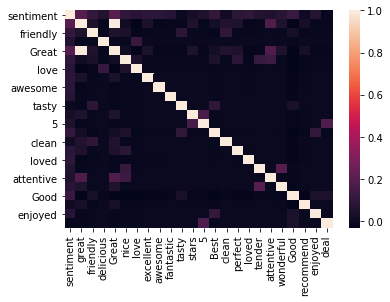

In [113]:
sns.heatmap(sentiment_raw.corr())

In [114]:
data = sentiment_raw[keywords]
target = sentiment_raw['sentiment']

### Naive Bayes Bernoulli Classifer ###

In [115]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 343


#### The Naive Bayes Classifier I created is about 65.7% accurate ####

### Naive Bayes Bernoulli Classifer on Amazon Feedback ###

In [116]:
amazon_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon_raw.columns = ['message', 'sentiment']

In [117]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [118]:
data = amazon_raw[keywords]
target = amazon_raw['sentiment']

In [119]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 387


#### Even though I used the same keyword list from the Yelp Feedback to create the Naive Bayes Classifer for the Amazon Feedback I still got about the same accuracy.  I predicted that it would do much worse, but it only did marginally worse. ####